**Problem Statement**

Year on year, hotels are witnessing an increased trend with cancellations. With one out of four hotel guests canceling bookings ahead of a stay, the trend has led to hotels not being able to accurately forecast occupancy within their revenue management besides facing loss in opportunity cost (unsold room due to cancellation). Some hotels think that high cancellations is the new norm in the industry. This however is a completely wrong approach.

**Goal**

The Goals of this project is to find out the characteristic of customers who cancelled and finding a pattern in cancelled booking by doing an exploratory data analysis and to build a classification machine learning model to predict cancellation, that has accuracy score around 0.75 - 0.9.

**Dataset Description**

0   **hotel**: Resort Hotel and City Hotel

1   **is_canceled**: Value indicating if the booking was canceled (1) or not (0)

2   **lead_time**: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

3   **arrival_date_year**: Year of arrival date

4   **arrival_date_month**: Month of arrival date

5   **arrival_date_week_number**: Week number of year for arrival date

6   **arrival_date_day_of_month**: Day of arrival date

7   **stays_in_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

8   **stays_in_week_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

9   **adults**: Number of adults

10  **children**: Number of children

11  **babies**: Number of babies

12  **meal**: Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined - SC - BB - HB - FB
                    
13  **country**: Country of origin. Categories are represented in the ISO 3155–3:2013 format

14  **market_segment**: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.Categories:Direct - Corporate - Online TA - Offline TA/TO - Complementary - Groups - Undefined - Aviation

15  **distribution_channel**: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.Categories: Direct - Corporate -TA/TO -Undefined - GDS

16  **is_repeated_guest**: Value indicating if the booking name was from a repeated guest (1) or not (0)

17  **previous_cancellations**: Number of previous bookings that were cancelled by the customer prior to the current booking

18  **previous_bookings_not_canceled**: Number of previous bookings not cancelled by the customer prior to the current booking

19  **reserved_room_type**: Code of room type reserved. Code is presented instead of designation for anonymity reasons. Different categories are 'C','A', 'D','E', 'G', 'F', 'H', 'L', 'P', 'B'

20  **assigned_room_type**: Code for the type of room assigned to the booking.Code is presented instead of designation for anonymity reasons.Different categories are C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K' 

21  **booking_changes**: Number of changes made to the booking from the moment the booking was entered on the PMS until the moment of check-in or out

22  **deposit_type**: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit - Refundable - Non Refund 

23  **agent**: ID of the travel agency that made the booking

24  **company**: ID of the company that made the booking or responsible for paying the booking.

25  **days_in_waiting_list**: Number of days the booking was in the waiting list before it was confirmed to the customer

26  **customer_type**: Type of booking, assuming one of four categories:Transient - Transient-Party - Contract - Group

27  **adr**: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

28  **required_car_parking_spaces**: Number of car parking spaces required by the customer

29  **total_of_special_requests**:Number of special requests made by the customer (e.g. twin bed or high floor)

30  **reservation_status**: Reservation last status, assuming one of three categories: Canceled - Check-Out - No-Show

31  **reservation_status_date**: Date at which the last status was set. 

**Importing Libraries** 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv("/content/hotel_bookings.csv")

In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
data.shape

(119390, 32)

Dataset consists of 119390 rows and 32 columns







In [ ]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Dataset consists of null values.


In [ ]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000




1.There is a value of a 'adr' column below 0 is impossible

2.Value of a 'adult' column ranges from 0 to 55.




In [ ]:
data.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461



1. City hotel is more popular than Resort hotel
2. Room type A is the mostly booked.
3. There are  guests arrived from 177 countries.



**Exploratory Data Analysis (EDA)**

**Univariate Analysis**

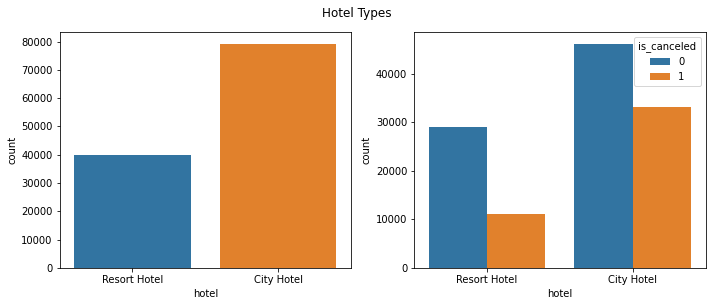

City Hotel      0.664461
Resort Hotel    0.335539
Name: hotel, dtype: float64

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(data['hotel'])
plt.subplot(1, 2, 2)
sns.countplot(data=data, x = 'hotel', hue='is_canceled')
plt.suptitle("Hotel Types",y=1.05)
plt.tight_layout()
plt.show()


data.hotel.value_counts(normalize=True)

* 66% of hotels booked are city hotels and 33% are resort hotels

* Irrespective of canceled or not, the Volume of bookings in Resort Hotels is quite less than that of the City hotels. 
The proportion cancellation is quite less as compared to non-canceled rooms in Resort Hotels. But the proportion of cancellations in City Hotels is quite high

2016    0.474973
2017    0.340791
2015    0.184237
Name: arrival_date_year, dtype: float64


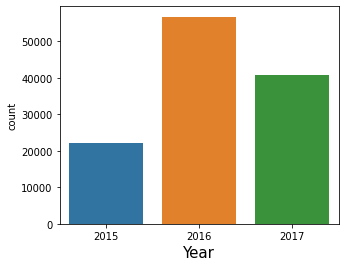

In [ ]:
# arrival_date_year
plt.figure(figsize=(5,4))
sns.countplot(data=data, x = 'arrival_date_year')
plt.xlabel('Year', fontsize=15)
print(data.arrival_date_year.value_counts(normalize=True))

47% bookings were done in 2016, 34% in 2017 and 18 percent in 2015

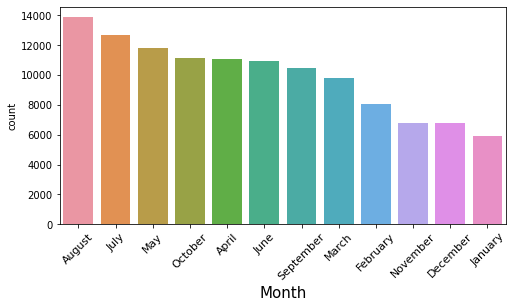

In [ ]:
# Month
plt.figure(figsize=(8,4))
sns.countplot(data=data, x = 'arrival_date_month',order = data['arrival_date_month'].value_counts().index)
plt.xlabel('Month', fontsize=15)
plt.xticks(rotation=45,fontsize=11);

The above plot shows that August was the busiest month and January was the least (Probably because of the Holiday season in Summer in August and Heavy Winter in January)

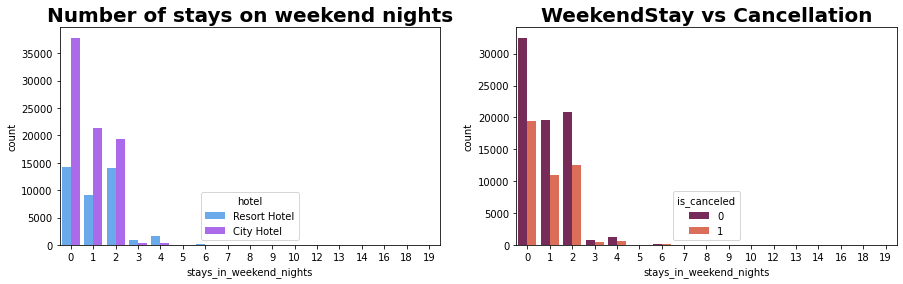

In [ ]:
#weekend stay
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
sns.countplot(x='stays_in_weekend_nights',hue='hotel', data=data, palette='cool')
plt.title("Number of stays on weekend nights",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = data, x = 'stays_in_weekend_nights', hue='is_canceled', palette='rocket')
plt.title('WeekendStay vs Cancellation',fontweight="bold", size=20)
plt.show()

In the first graph we can see that most of the weekend nights were booked in City Hotel

Second plot shows most of weekend nights which were booked were not canceled

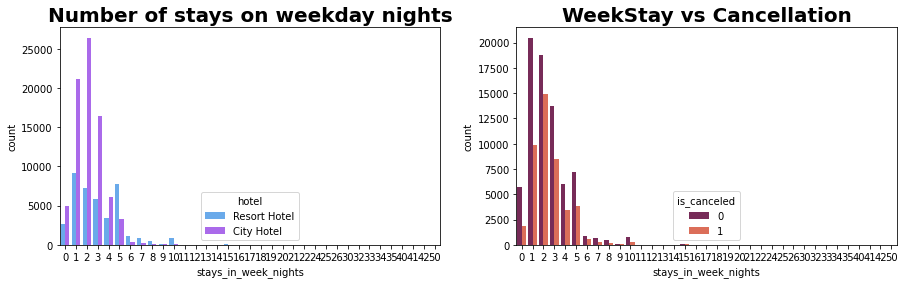

In [ ]:
# WeekStay
plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
sns.countplot(x='stays_in_week_nights',hue='hotel', data=data, palette='cool')
plt.title("Number of stays on weekday nights",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = data, x = 'stays_in_week_nights', hue='is_canceled', palette='rocket')
plt.title('WeekStay vs Cancellation',fontweight="bold", size=20)
plt.show()

In the first graph we can see that most of the weekend nights were booked in City Hotel

Second plot shows most of weekend nights which were booked were not canceled

Text(0.5, 1.0, 'Number of Babies in both hotels')

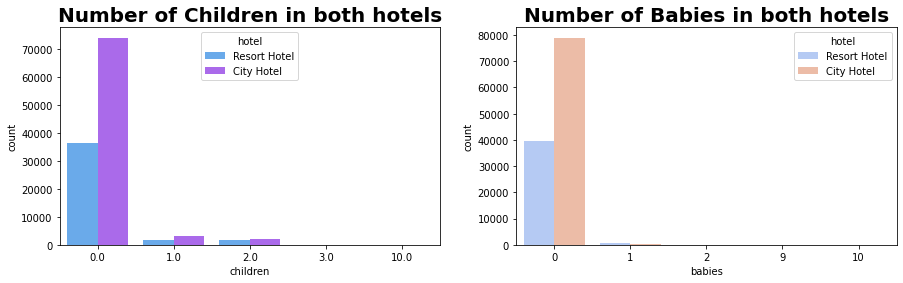

In [ ]:
#children and babies
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
sns.countplot(x='children',hue='hotel', data=data, palette='cool')
plt.title("Number of Children in both hotels",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(x='babies',hue='hotel', data=data, palette='coolwarm')
plt.title("Number of Babies in both hotels",fontweight="bold", size=20)

Most visitors arrived in pair with no children/ Babies and preferred City hotel over resort hotel

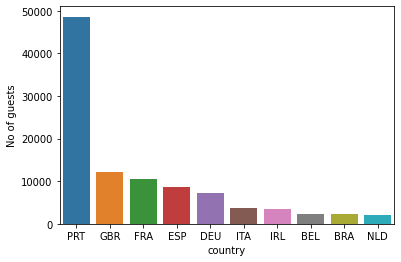

In [ ]:
#country
data1= data['country'].value_counts().head(10).reset_index()
data1.columns = ['country', 'No of guests']
sns.barplot(data=data1, x = 'country', y = 'No of guests')
plt.show()

Most of the guests are from Portugal which is reasonable because both hotels are in PRT.
Next in line for the highest number of guests are Great Britain, France, Spain, Germany, and Italy respectively.

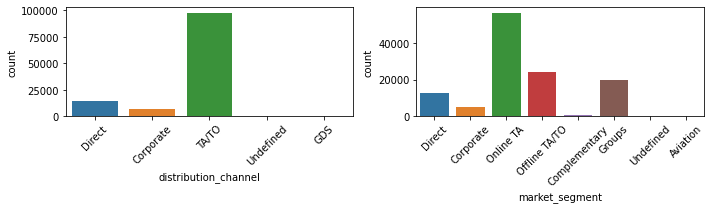

Online TA        0.473046
Offline TA/TO    0.202856
Groups           0.165935
Direct           0.105587
Corporate        0.044350
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: market_segment, dtype: float64


In [ ]:
#Market Segment & Distribution Channel
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.countplot(data=data, x = 'distribution_channel')
plt.xticks(rotation=45,fontsize=10)
plt.subplot(1,2,2)
sns.countplot(data=data, x = 'market_segment')
plt.xticks(rotation=45,fontsize=10)
plt.tight_layout()
plt.show()
print(data.market_segment.value_counts(normalize=True))

As we can see from the table below that Travel Agent or Tour Operator is the biggest booking distribution channel 
compared to others followed by Direct as the second most largest distribution channel

We see from here that travel agent (online and offline) market segment dominating the booking compared to other market segment

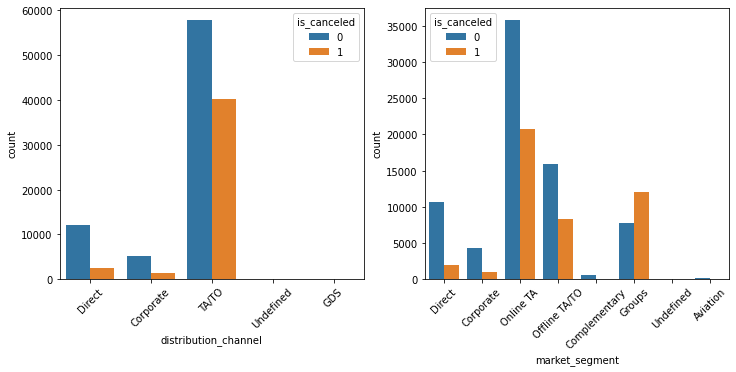

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(data=data, x = 'distribution_channel',hue='is_canceled')
plt.xticks(rotation=45,fontsize=10)
plt.subplot(1,2,2)
sns.countplot(data=data, x = 'market_segment',hue='is_canceled')
plt.xticks(rotation=45,fontsize=10)
plt.show()

Travel Agent / Tour Operators has the highest cancellation rate among all the distribution channel while direct has the lowest cancellation rate 

We see here that group market segment has a higher cancel rate next to it is travel agent (online) and offline has almost a similar number in term of cancellation rate
The lowest cancellation rate is for complimentary and  direct booking.

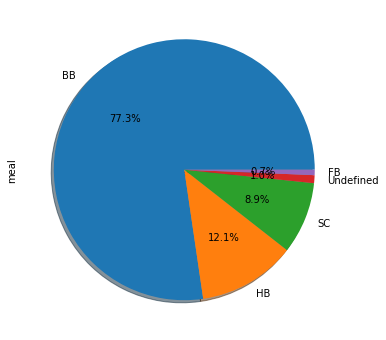

In [ ]:
#Meal Type
plt.figure(figsize=(6,6))
data['meal'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

Bed and breakfast is the most popular meal package compared to the rest of the meal package while full board is the least popular meal package compared to the rest of the meal package 

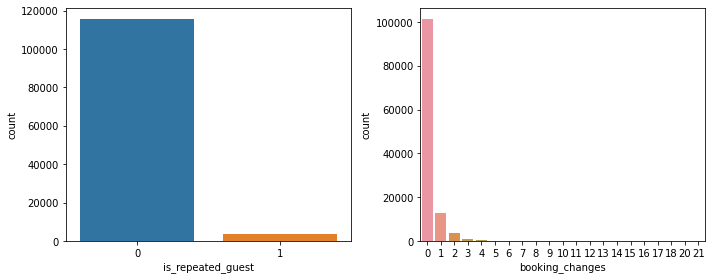

0    0.968088
1    0.031912
Name: is_repeated_guest, dtype: float64

  0    0.848597
1    0.106382
2    0.031870
3    0.007764
4    0.003149
Name: booking_changes, dtype: float64


In [ ]:
#'is_repeated_guest', booking_changes
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(data=data, x = 'is_repeated_guest')
plt.subplot(1,2,2)
sns.countplot(data=data, x = 'booking_changes')
plt.tight_layout()
plt.show()
print(data.is_repeated_guest.value_counts(normalize=True))
print('\n ',data.booking_changes.value_counts(normalize=True).head())

From this table below we see that there are only 3.1 % of repeated guest from this booking. This might be affecting the cancellation of the hotel from the low rate of loyal customers

Almost 85 % of the customers never change their booking 

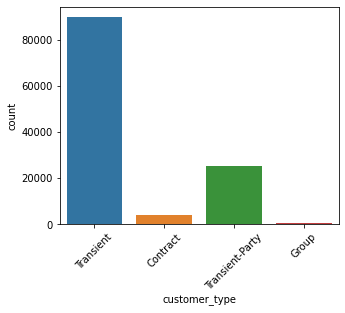

In [ ]:
# customer_type
plt.figure(figsize=(5,4))
sns.countplot(data=data, x = 'customer_type')
plt.xticks(rotation=45,fontsize=10)
plt.show()

Majority of the booking  customer here are transient (individual booking /personal not related to company or anything)

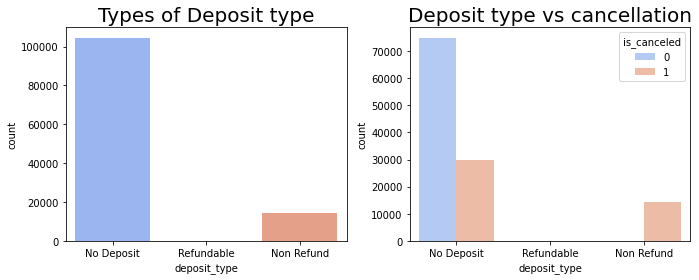

In [ ]:
#deposit
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(data = data, x = 'deposit_type', palette='coolwarm')
plt.title('Types of Deposit type', size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = data, x = 'deposit_type',hue='is_canceled' ,palette='coolwarm')
plt.title('Deposit type vs cancellation', size=20)
plt.tight_layout()
plt.show()

No deposit type is the most popular compared to other deposit type.This might be the reason why the cancellation in the industry has been on a rise.The flexibility that's given to the customer to book hotel without any deposit.

Surprisingly non refundable deposit has the highest cancellation rate among all deposit types

In [ ]:
data.groupby(["deposit_type"])["lead_time"].median()

deposit_type
No Deposit     56.0
Non Refund    183.0
Refundable    169.0
Name: lead_time, dtype: float64

The reason why non refund has the highest cancellation is because of the longer lead time.
Longer the lead time the higher the chances of cancellation happening 
as we can see from the table above Non Refund Booking Has the highest median lead time

In [ ]:
#previous_cancellations

data['previous_cancellations'].unique()

array([ 0,  1,  2,  3, 26, 25, 14,  4, 24, 19,  5, 21,  6, 13, 11])

In [ ]:
# we will group this into booking that's never been cancelled (0)or have been cancelled before(1)
df1=data[['previous_cancellations','is_canceled']]
df1['previous_cancellations']=np.where(df1["previous_cancellations"] == 0, 0, 1)
df1['previous_cancellations'].unique()

array([0, 1])

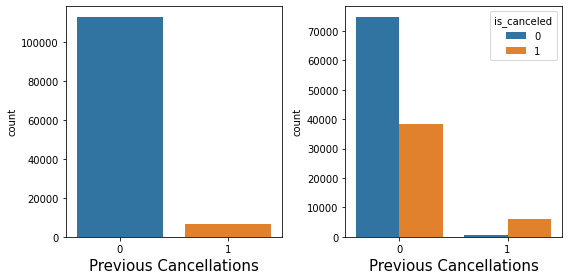

0    0.945691
1    0.054309
Name: previous_cancellations, dtype: float64

 is_canceled                    0         1
previous_cancellations                    
0                       0.660939  0.339061
1                       0.083590  0.916410


In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.countplot(data=df1, x = 'previous_cancellations')
plt.xlabel('Previous Cancellations', fontsize=15)
plt.subplot(1, 2, 2)
sns.countplot(data=df1, x = 'previous_cancellations',hue='is_canceled')
plt.xlabel('Previous Cancellations', fontsize=15)
plt.tight_layout()
plt.show()
print(df1['previous_cancellations'].value_counts(normalize=True))
print('\n',pd.crosstab(df1['previous_cancellations'], df1['is_canceled'], normalize = 'index'))

Almost 95% of the booking never been cancelled before in this data set

92% of booking done by customers that previously cancelled are cancelled again
This tell us that booking that's been cancelled are more likely to be cancelled again

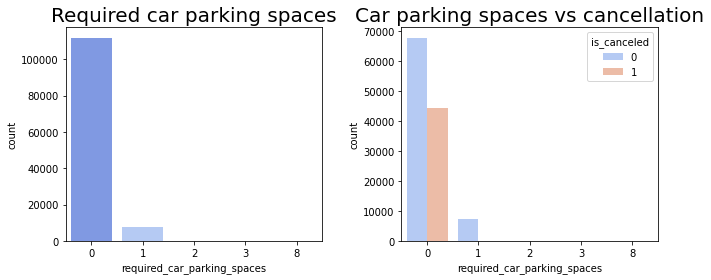

0    0.937884
1    0.061839
2    0.000235
3    0.000025
8    0.000017
Name: required_car_parking_spaces, dtype: float64


In [ ]:
# Parking Space
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(data = data, x = 'required_car_parking_spaces', palette='coolwarm')
plt.title('Required car parking spaces', size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = data, x = 'required_car_parking_spaces',hue='is_canceled' ,palette='coolwarm')
plt.title('Car parking spaces vs cancellation', size=20)
plt.legend(loc='upper right',title='is_canceled')
plt.tight_layout()
plt.show()
print(data.required_car_parking_spaces.value_counts(normalize=True))

Over 93 % of people does not need any parking space. 

Also here we can see that customer who need a parking spot for their vehicle actually never cancelled their hotel booking.

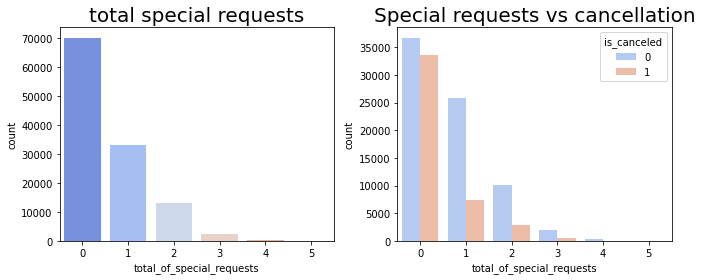

0    0.588977
1    0.278298
2    0.108627
3    0.020915
4    0.002848
5    0.000335
Name: total_of_special_requests, dtype: float64


In [ ]:
#special Requests
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(data = data, x = 'total_of_special_requests', palette='coolwarm')
plt.title('total special requests', size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = data, x = 'total_of_special_requests',hue='is_canceled' ,palette='coolwarm')
plt.title('Special requests vs cancellation', size=20)
plt.tight_layout()
plt.show()
print(data.total_of_special_requests.value_counts(normalize=True))

 from the fig 58% of customers did not made any special requests.
 From second fig We can see that the cancellation rate is high among customers who made no booking changes. 
 Customers who booked and requested a lot of stuff are
more like like not to canceled compared to customer who did not have special requests 

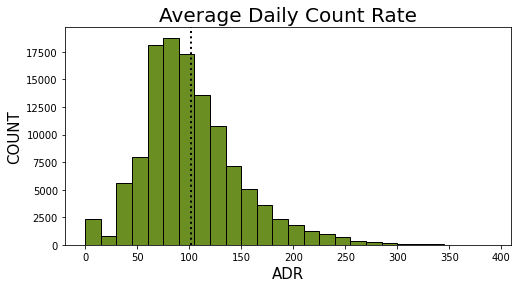

In [ ]:
# adr 
bins= [i for i in range(0,400,15)]
plt.figure(figsize=(8,4))
plt.hist(data['adr'],bins,rwidth=10,color='olivedrab',ec='k')
plt.title("Average Daily Count Rate",fontsize = 20)
plt.xlabel("ADR",fontsize = 15)
plt.ylabel("COUNT",fontsize = 15)
plt.axvline(data['adr'].mean(), color='k', linestyle=':', linewidth=2)
plt.show()

Dotted line indicates the average value of ADR

Most hotels have adr range between 50-100

Few hotels have adr above 150


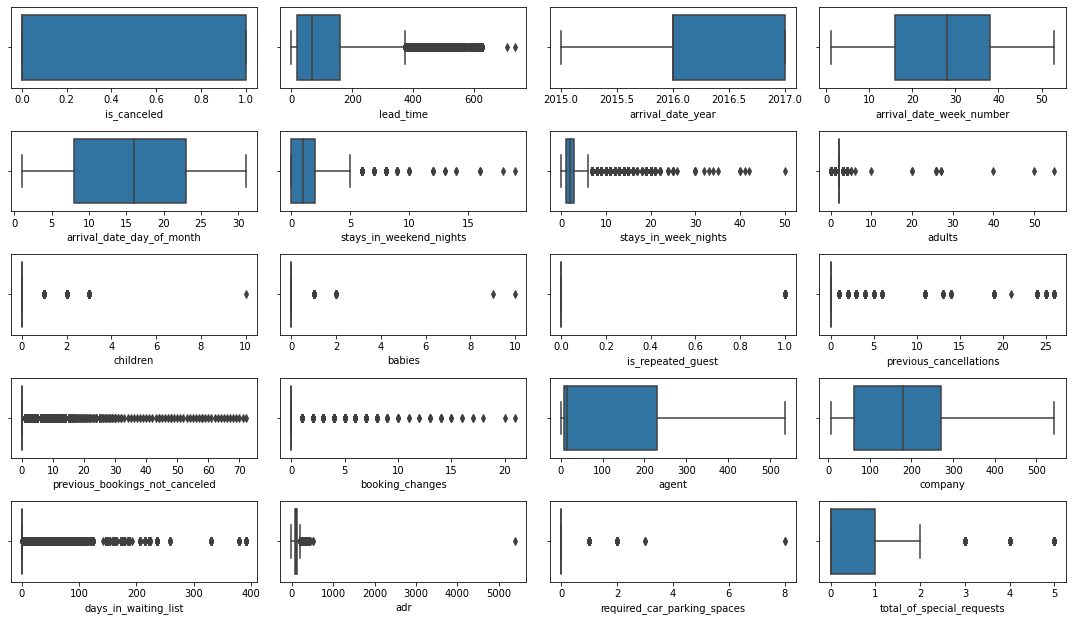

In [ ]:
#boxplot
df_numerical = data.select_dtypes(exclude='object')
x=1
plt.figure(figsize = (15, 10))
for col in df_numerical.columns:
    plt.subplot(6,4,x)
    sns.boxplot(data[col])
    x+=1
plt.tight_layout()

We can see that there are many outliers in many of the columns

There's one value of adr that's above 5000

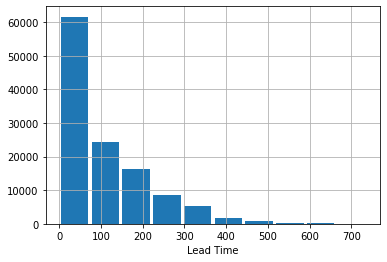

In [ ]:
#histogram
data.lead_time.hist(figsize = (6, 4),rwidth=0.9)
plt.xlabel('Lead Time')
plt.show()

Shortest lead time (within 50 days) generated the highest
bookings.

**Bivariate** **analysis**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

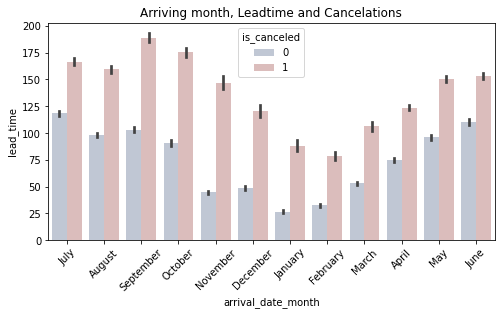

In [ ]:
# Arriving year, Leadtime and Cancelations
plt.figure(figsize=(8,4))
sns.barplot(x='arrival_date_month', y='lead_time',hue='is_canceled', data= data, palette='vlag')
plt.title('Arriving month, Leadtime and Cancelations')
plt.xticks(rotation=45,fontsize=10)

For all the months, bookings with a lead time less than 125 days have fewer chances of getting canceled, and lead time more than 125 days have more chances of getting canceled.

Text(0.5, 1.0, 'Arriving year, waiting days and Cancelations')

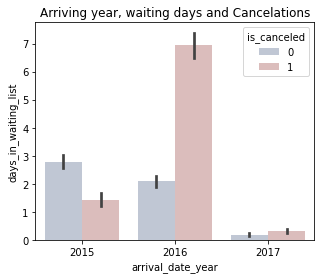

In [ ]:
# Arriving year, waiting list and Cancelations
plt.figure(figsize=(5,4))
sns.barplot(x='arrival_date_year', y='days_in_waiting_list',hue='is_canceled', data= data, palette='vlag')
plt.title('Arriving year, waiting days and Cancelations')

For all the 3 years, bookings with a waiting days less than 4 days have fewer chances of getting canceled, and waiting days more than 4 days have more chances of getting canceled.

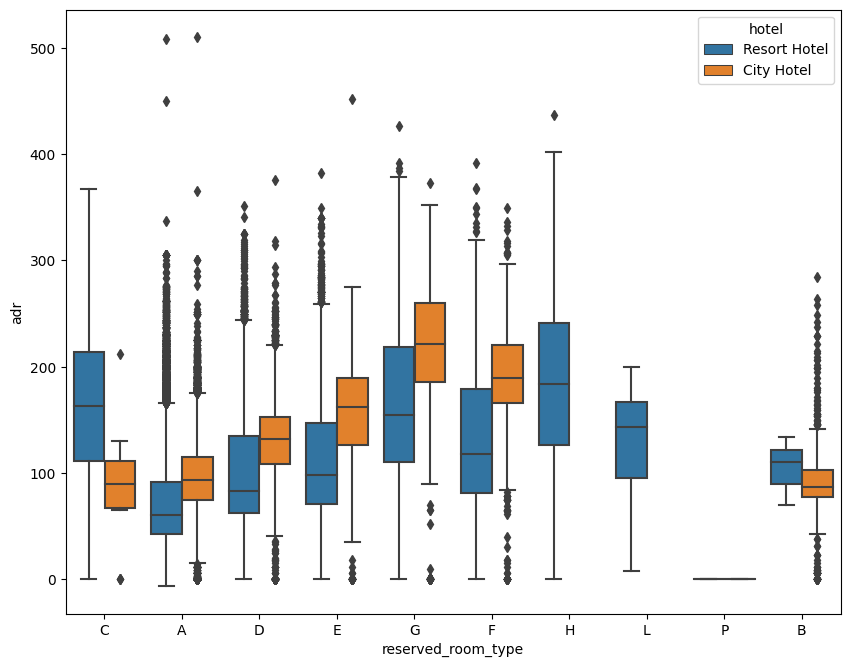

In [ ]:
#reserved room and ADR
fig = plt.figure(figsize=(10,8), dpi = 100)
sns.boxplot(data=data[data['adr']<1000], x = 'reserved_room_type', y = 'adr', hue = 'hotel')
plt.show()

For city hotels, the highest ADR is seen for Room type ‘G’ and the lowest ADR for room type ‘C’.For Resort hotels, the highest ADR is seen for Room types ‘C’ and ‘H’ and type ‘A’ rooms have the lowest ADR.

We can observe that the room category for the lowest ADR in City hotels has the highest ADR for Resort Hotels. From, this we can estimate that room type is ‘C’ is the category for luxury rooms with recreational and entertainment facilities. As City hotels are extensively used for Business/work purposes by working professionals for short stays, this room category does not contribute to the City Hotel’s earning but plays a major role in the earnings of a Resort hotel.

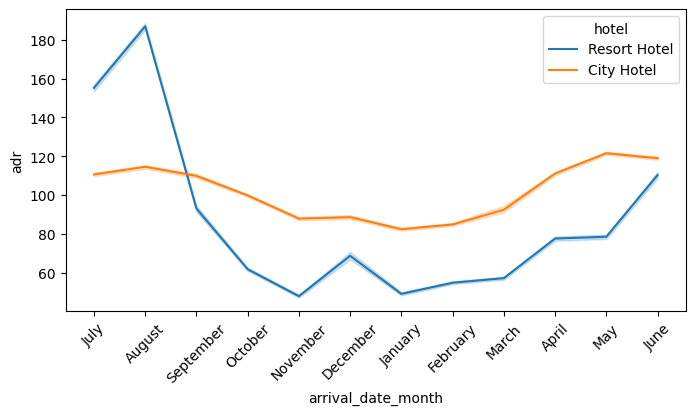

In [ ]:
#adr vs month for hotels
fig = plt.figure(figsize=(8,4),dpi=100)

sns.lineplot(data=data, x= 'arrival_date_month', y = 'adr', hue='hotel',)
plt.xticks(rotation=45,fontsize=10);

This plot shows that August was the busiest month. For Resort Hotel, the Average Daily Rate is high during July and August. For City Hotel, the ADR is high in May and June months.

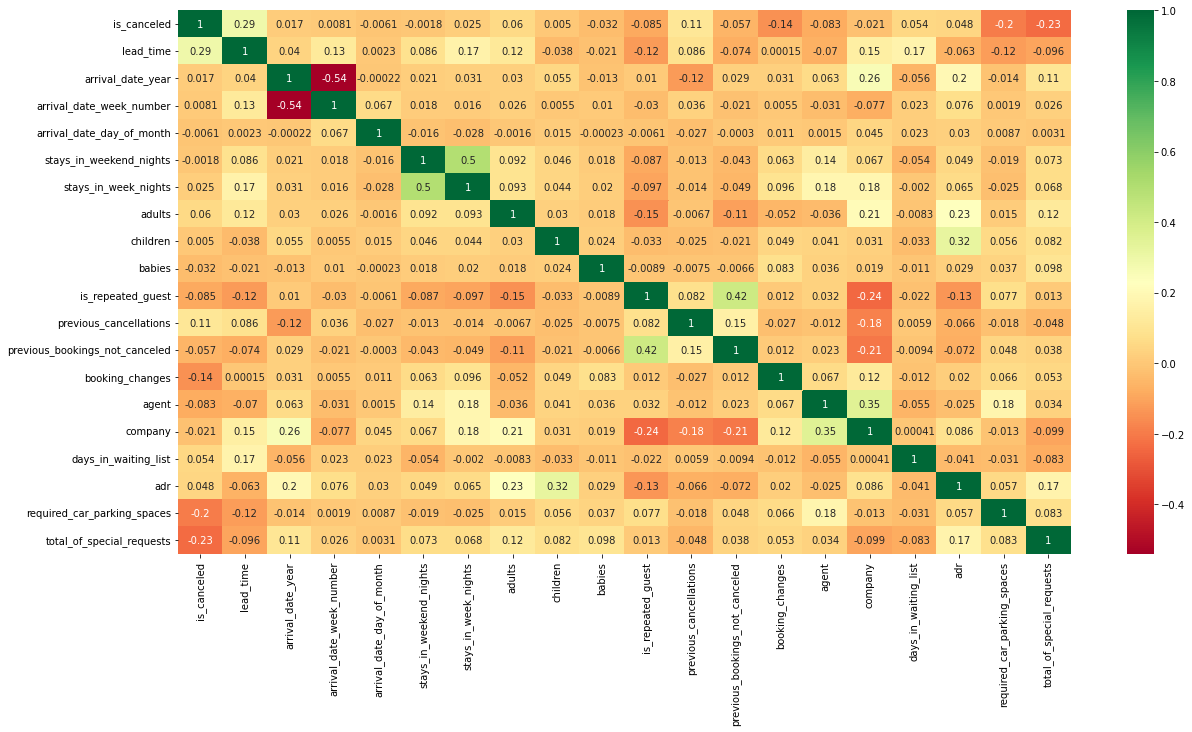

In [ ]:
#Lets see the correlation
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')


* Lead time is the most highly correlated feature in knowing whether a booking gets canceled or not. Chances of cancellation increases with increase in lead time.
* Highest positive correlations is shown by previous_cancellations also.
* The highest negative correlations are shown by total_of_special_requests and required_car_parking_spaces with thw target variable

## **Conclusion**

1. **Market Segment & Booking Cancellation.**

  *We see here that group market segment has a higher cancel rate compared, next to it is travel agent (online) and offline has almost a similar number in term of cancellation rate

  *The lowest cancellation rate is for complimentary and  direct booking.

**2. Lead Time & Cancellation Rate**
   * From the analysis we can see that for all the months, bookings with a lead time less than 125 days have fewer chance of getting cancelled, and lead time more than 125 days have higher chance of getting cancelled.

**3.Deposit Type & Cancellation Rate**
  * This Dataset has 3 kinds of deposit type NO Deposit, NO Refund, and Refundable. Based on our analysis we found out that:
No Refund Booking has the highest cancellation rate followed by No Deposit and Refundable types. 

* It was surprising to see No Refund Booking type having highest cancellation rate. On further analysis we found out this was due to the higher Median lead time for No Refund type of booking as compared to others.

**4. Previous Cancellation & Cancellation**
   
  * 92% of booking done by customers that previously cancelled are likely to be cancelled again.

**5.Parking Space & Cancellation**

   * Over 90% of customers does not need any parking space. Also here we can see that customer who need a parking spot for their vehicle actually never cancelled their hotel booking.

# **Recommendation**

1.**Only Non Refundable Deposit For Group Booking**
 * From the analysis we see that group booking has the highest cancellation rate among all market segment, only allowing non refundable deposit for group booking will help protect the hotel from losing revenue due to last minute cancellation and not able to find replacement. Only Allowing Non Refundable Rates might result in fewer bookings for Group, however it might protect the hotel from losing revenue

**2. Setting a Maximum Lead Time Limit for Booking**
  * We see a pattern that booking that has more than 125 days of lead time are more likely to be canceled, setting up maximum lead time means it wont be able to make booking that's too far in advance (> 125 days).
  * Also can set up Non Refundable Deposit for booking that's more than 125 days in advance. This will help the hotel get more exposure without higher risk of cancellation. 

**3. Increase Direct Booking Market Segment**
 * From this dataset we see that direct booking has the least cancellation rate (outside complimentary) compared to other market segment, with only being 10% of total bookings. Having more booking from direct market segment will likely to reduce the number of cancellation.

**4.Stricter Cancellation For Previously Cancelled Booking**

 * Bookings by previously cancelled customers have 92% Cancellation Rate looking at this pattern we know that booking that are made by these customers  are most likely to be cancelled again. 
 * To protect the hotel from losing revenue due to this pattern hotel need to collect payment in advance for bookings done by these customers. This will help hotel preventing lose of revenue from last minute cancellation from this kind of booking

**5.Attracting Customer That Drive**
  * Over 93 % of people does not need any parking space. Also the customers who need a parking spot for their vehicle actually never cancelled their hotel booking.
  * The hotel could promote anything that makes people who vehicle life easier, eg(free valet, free charging for electric car and free parking)

## **Data Pre-Processing**

**a. Missing values**

In [ ]:
#checking missing values
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

There are missing values in the dataset

In [ ]:
# Missing values in percentage
data.isnull().sum()/(len(data))*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [ ]:
# we will fill it with mode since in some case median or mean of a value is a float and you can't have a float value children
data['children'] = data['children'].fillna(data['children'].mode()[0])

In [ ]:
# the country column we will fill it with the most frequent value of the column 
data['country'] = data['country'].fillna(data['country'].mode()[0])

In [ ]:
#the agent column we will fill it with the most frequent value of the column
data['agent'] = data['agent'].fillna(data['agent'].mode()[0])

In [ ]:
#  we will drop the company column since it has more than 90% of null value
data =data.drop(['company'],axis=1)

In [ ]:
data.shape

(119390, 31)

In [ ]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

All missing values are filled /removed

**b. Outlier Detetcion and Removal**

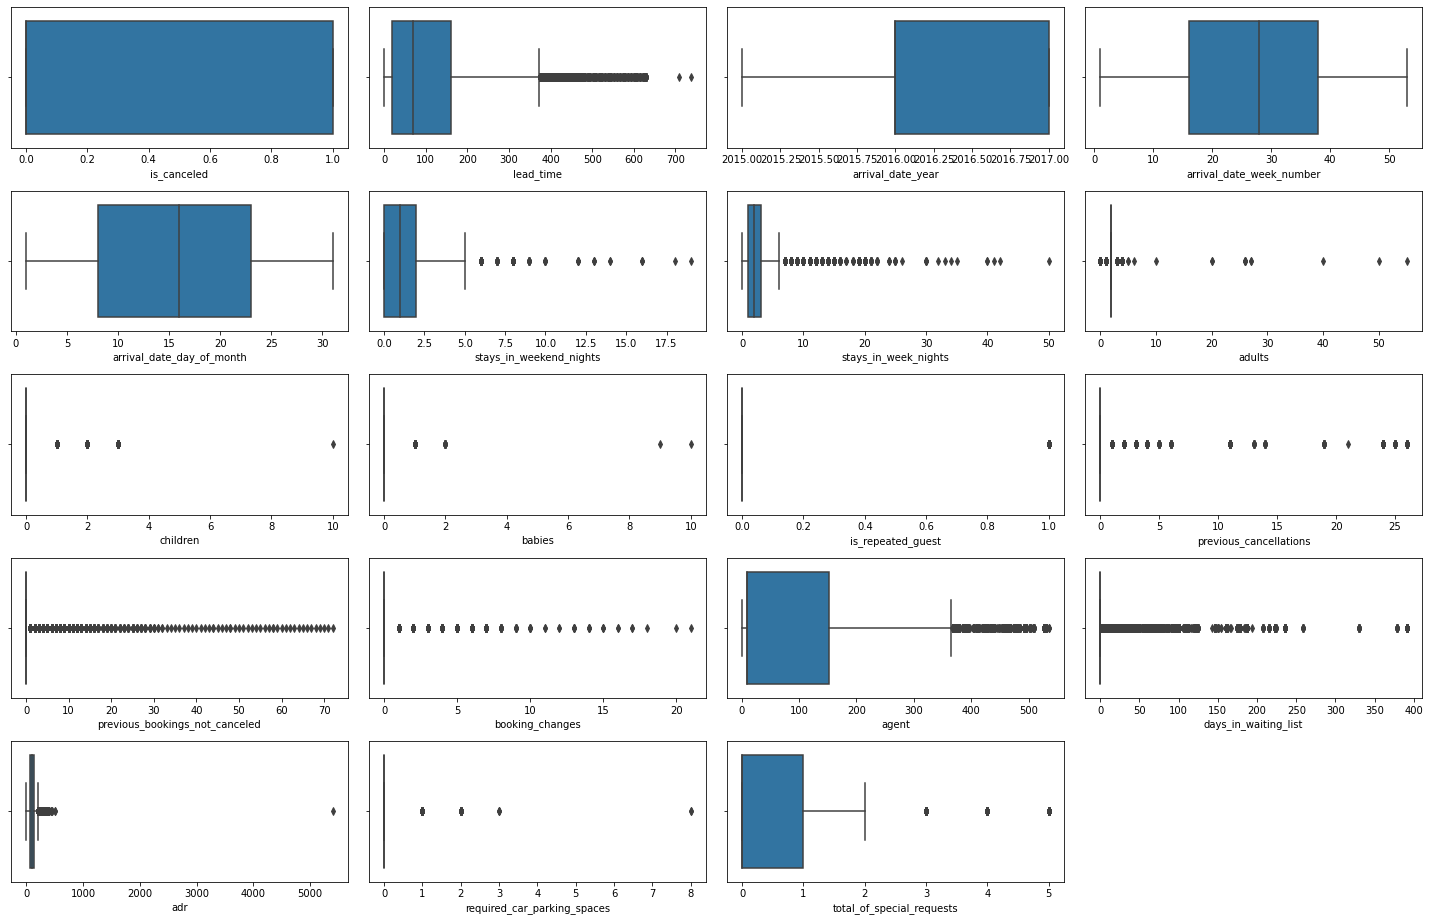

In [ ]:
# Plot boxplot to find outliers
#boxplot
df_numerical = data.select_dtypes(exclude='object')
x=1
plt.figure(figsize = (20, 15))
for col in df_numerical.columns:
    plt.subplot(6,4,x)
    sns.boxplot(data[col])
    x+=1
plt.tight_layout()

There are outliers in the dataset. We will remove outlier from 'lead_time', 'stays_in_weekend_nights','stays_in_week_nights','agent','adr', 'total_of_special_requests' these featutes as outliers in other features signify that data is significantly different from others.

In [ ]:
# define a function called 'outliers' which returns a list of outliers
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
#create list to store indexes of outliers
    ls= df.index[(df[ft]<lower) | (df[ft]>upper)]
    return ls

In [ ]:
#create an empty list to store indexes from multiple columns
index_list=[]
for feature in ['lead_time', 'stays_in_weekend_nights','stays_in_week_nights','agent','adr', 'total_of_special_requests']:
    index_list.extend(outliers(data,feature))
index_list

[1,
 225,
 890,
 1516,
 1672,
 4182,
 5704,
 5705,
 5707,
 5708,
 5712,
 5713,
 5714,
 5715,
 5716,
 5717,
 6829,
 6920,
 7318,
 7811,
 7846,
 7847,
 7848,
 7849,
 7850,
 7866,
 7898,
 7904,
 8045,
 8122,
 8124,
 8127,
 8200,
 8220,
 8221,
 8223,
 8224,
 8271,
 8272,
 8273,
 8274,
 8275,
 8276,
 8277,
 8278,
 8279,
 8280,
 8281,
 8283,
 8284,
 8285,
 8286,
 8304,
 8305,
 8306,
 8307,
 8308,
 8309,
 8310,
 8311,
 8312,
 8313,
 8314,
 8315,
 8316,
 8321,
 8322,
 8323,
 8324,
 8328,
 8329,
 8330,
 8331,
 8332,
 8395,
 8397,
 8399,
 8400,
 8419,
 8421,
 8422,
 8423,
 8425,
 8428,
 8505,
 8506,
 8546,
 8547,
 8549,
 8550,
 8551,
 8552,
 8554,
 8555,
 8556,
 8557,
 8558,
 8559,
 8560,
 8561,
 8562,
 8563,
 8565,
 8566,
 8567,
 8568,
 8569,
 8570,
 8571,
 8572,
 8573,
 8574,
 8575,
 8576,
 8577,
 8578,
 8579,
 8580,
 8581,
 8582,
 8583,
 8584,
 8585,
 8586,
 8587,
 8589,
 8590,
 8591,
 8592,
 8593,
 8594,
 8595,
 8596,
 8597,
 8598,
 8599,
 8600,
 8603,
 8613,
 8617,
 8618,
 8619,
 8620,
 862

In [ ]:
#define a function called 'remove' which returns a cleaned data without outliers
def remove(df,ls):
    ls=sorted(set(ls)) #to sort and remove multiple copies(to get unique)
    df=df.drop(ls)
    return df

In [ ]:
data=remove(data,index_list)

In [ ]:
data.shape

(105722, 31)

**ADR Abnormal Value**

In [ ]:
# there are a value of a adr columns that below 0 since it is impossible for hotel to owe money to the guest 
data = data.drop(data[data.adr < 0].index)
data[data['adr'] < 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [ ]:
data.shape

(105721, 31)

**c. Encoding**

In [ ]:
#Finding categorical columns and changing datatype
for cl in data.select_dtypes(include = ['object']):
    data[cl]=data[cl].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105721 entries, 0 to 119388
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   hotel                           105721 non-null  category
 1   is_canceled                     105721 non-null  int64   
 2   lead_time                       105721 non-null  int64   
 3   arrival_date_year               105721 non-null  int64   
 4   arrival_date_month              105721 non-null  category
 5   arrival_date_week_number        105721 non-null  int64   
 6   arrival_date_day_of_month       105721 non-null  int64   
 7   stays_in_weekend_nights         105721 non-null  int64   
 8   stays_in_week_nights            105721 non-null  int64   
 9   adults                          105721 non-null  int64   
 10  children                        105721 non-null  float64 
 11  babies                          105721 non-null  int64   
 12  me

**One hot Encoding**

In [ ]:
ohe=[]
values=['market_segment','deposit_type', 'customer_type']
for i in values:
    ohe.append(pd.get_dummies(data[i]))
dummy=pd.concat(ohe,axis=1)
new_data=pd.concat((data,dummy),axis=1)
new_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,Offline TA/TO,Online TA,Undefined,No Deposit,Non Refund,Refundable,Contract,Group,Transient,Transient-Party
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,0,1,0,0,0,0,1,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,1,0,0,0,0,1,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,0,1,0,0,0,0,1,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,1,0,1,0,0,0,0,1,0
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,1,0,1,0,0,0,0,1,0


In [ ]:
new_data=new_data.drop(['market_segment','deposit_type', 'customer_type'],axis=1)

**Label Encoding**

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
#since that there's so many unique values from all the countries where the booking comes from we will group it into booking from portugal(1) and booking from outside portugal(0) since both of the hotel are in portugal
new_data['country']=np.where(data["country"] == 'PRT', 0, 1)
new_data['country'].unique()

array([0, 1])

In [ ]:
#label encoding hotel
new_data['hotel']=le.fit_transform(data['hotel'])

In [ ]:
# label encoding arrival_date_month
new_data['arrival_date_month']=new_data.arrival_date_month.map({
   'January': 0,
   'February': 1,
    'March':2,
    'April' :3,
    'May':4,
    'June':5,
    'July':6,
    'August':7,
    'September':8,
    'October':9,
    'November':10,
    'December':11
    })

In [ ]:
new_data.shape

(105721, 43)

**d. feature Reduction**

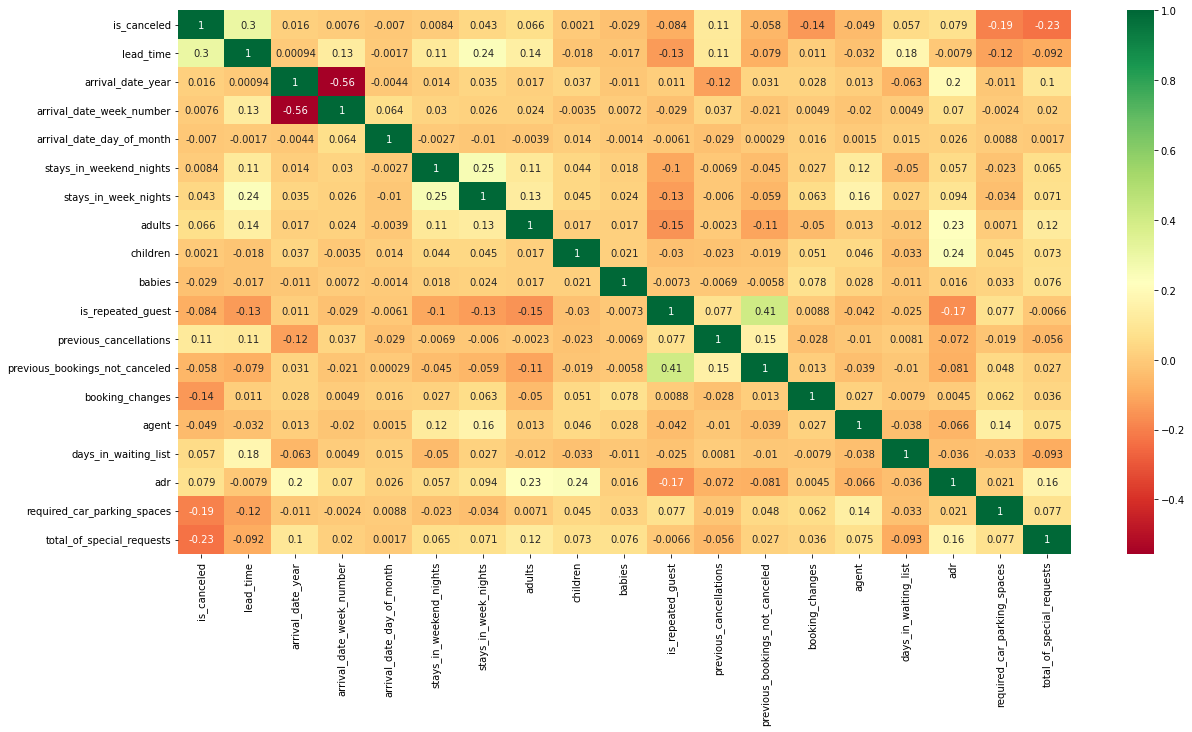

In [ ]:
#Lets see the correlation
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

'arrival_date_week_number' and 'arrival_date_year' have high negative correlation. So need to consider only one amoung them for model creation and can drop the other

In [ ]:
new_data=new_data.drop('arrival_date_week_number',axis=1)

In [ ]:
new_data.shape

(105721, 42)

**Dropping Irrelevant Columns**

In [ ]:
new_data=new_data.drop(['reservation_status', 'reservation_status_date','arrival_date_day_of_month', 'meal', 'is_repeated_guest','previous_bookings_not_canceled','reserved_room_type', 'assigned_room_type', 'agent',
       'days_in_waiting_list','distribution_channel','arrival_date_year'],axis=1)

In [ ]:
new_data.shape

(105721, 30)

**Splitting the data** 

In [ ]:
#target
y=new_data['is_canceled']

In [ ]:
x=new_data.drop(['is_canceled'],axis=1)

In [ ]:
x.shape

(105721, 29)

**e.Feature Engineering**

In [ ]:
# total guest of the hotel booking by adding  adults, children and babies
x['total_guests'] = x['adults'] + x['children'] + x['babies']

In [ ]:
#getting the total stays column by adding weekday stays and the weekend stays
x['total_stay'] = x['stays_in_weekend_nights'] + x['stays_in_week_nights']

In [ ]:
# total kids of the hotel booking by adding children and babies
x['kids'] =x['children'] + x['babies']

In [ ]:
x.head()

,hotel,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,previous_cancellations,...,No Deposit,Non Refund,Refundable,Contract,Group,Transient,Transient-Party,total_guests,total_stay,kids
0,1,342,6,0,0,2,0.0,0,0,0,...,1,0,0,0,0,1,0,2.0,0,0.0
2,1,7,6,0,1,1,0.0,0,1,0,...,1,0,0,0,0,1,0,1.0,1,0.0
3,1,13,6,0,1,1,0.0,0,1,0,...,1,0,0,0,0,1,0,1.0,1,0.0
4,1,14,6,0,2,2,0.0,0,1,0,...,1,0,0,0,0,1,0,2.0,2,0.0
5,1,14,6,0,2,2,0.0,0,1,0,...,1,0,0,0,0,1,0,2.0,2,0.0


In [ ]:
#Dropping Redundant Column
# since we have columns that that's have almost similar value like children babies, now is combined into kids
# stays in weekend nights and stays in week nights now combined into total stays

# we will be dropping these columns 

x=x.drop(columns = ['stays_in_weekend_nights', 'stays_in_week_nights', 'babies', 'children','adults','adr'],axis=1)
x.head()

,hotel,lead_time,arrival_date_month,country,previous_cancellations,booking_changes,required_car_parking_spaces,total_of_special_requests,Aviation,Complementary,...,No Deposit,Non Refund,Refundable,Contract,Group,Transient,Transient-Party,total_guests,total_stay,kids
0,1,342,6,0,0,3,0,0,0,0,...,1,0,0,0,0,1,0,2.0,0,0.0
2,1,7,6,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1.0,1,0.0
3,1,13,6,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1.0,1,0.0
4,1,14,6,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,2.0,2,0.0
5,1,14,6,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,2.0,2,0.0


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105721 entries, 0 to 119388
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   hotel                        105721 non-null  int64   
 1   lead_time                    105721 non-null  int64   
 2   arrival_date_month           105721 non-null  category
 3   country                      105721 non-null  int64   
 4   previous_cancellations       105721 non-null  int64   
 5   booking_changes              105721 non-null  int64   
 6   required_car_parking_spaces  105721 non-null  int64   
 7   total_of_special_requests    105721 non-null  int64   
 8   Aviation                     105721 non-null  uint8   
 9   Complementary                105721 non-null  uint8   
 10  Corporate                    105721 non-null  uint8   
 11  Direct                       105721 non-null  uint8   
 12  Groups                       105721 non-null

In [ ]:
#changing datatype
for cl in  ['arrival_date_month','kids','total_guests']:
    x[cl]=x[cl].astype('int64')

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105721 entries, 0 to 119388
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   hotel                        105721 non-null  int64
 1   lead_time                    105721 non-null  int64
 2   arrival_date_month           105721 non-null  int64
 3   country                      105721 non-null  int64
 4   previous_cancellations       105721 non-null  int64
 5   booking_changes              105721 non-null  int64
 6   required_car_parking_spaces  105721 non-null  int64
 7   total_of_special_requests    105721 non-null  int64
 8   Aviation                     105721 non-null  uint8
 9   Complementary                105721 non-null  uint8
 10  Corporate                    105721 non-null  uint8
 11  Direct                       105721 non-null  uint8
 12  Groups                       105721 non-null  uint8
 13  Offline TA/TO                

**f.Scaling**

Standardization is much less affected by outliers as compared to MinMax scaling

**Standard Scaling**

In [ ]:
cols= x.columns

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scale=['lead_time','previous_cancellations', 'booking_changes',
      'required_car_parking_spaces', 'total_of_special_requests','total_guests',
       'total_stay', 'kids']
x[scale] = ss.fit_transform(x[scale])

In [ ]:
x.head()

,hotel,lead_time,arrival_date_month,country,previous_cancellations,booking_changes,required_car_parking_spaces,total_of_special_requests,Aviation,Complementary,...,No Deposit,Non Refund,Refundable,Contract,Group,Transient,Transient-Party,total_guests,total_stay,kids
0,1,2.660564,6,0,-0.105319,4.546647,-0.25175,-0.740363,0,0,...,1,0,0,0,0,1,0,0.100789,-1.700796,-0.245182
2,1,-0.942576,6,1,-0.105319,-0.338769,-0.25175,-0.740363,0,0,...,1,0,0,0,0,1,0,-1.328144,-1.157050,-0.245182
3,1,-0.878042,6,1,-0.105319,-0.338769,-0.25175,-0.740363,0,0,...,1,0,0,0,0,1,0,-1.328144,-1.157050,-0.245182
4,1,-0.867286,6,1,-0.105319,-0.338769,-0.25175,0.712830,0,0,...,1,0,0,0,0,1,0,0.100789,-0.613303,-0.245182
5,1,-0.867286,6,1,-0.105319,-0.338769,-0.25175,0.712830,0,0,...,1,0,0,0,0,1,0,0.100789,-0.613303,-0.245182


In [ ]:
x.describe()

,hotel,lead_time,arrival_date_month,country,previous_cancellations,booking_changes,required_car_parking_spaces,total_of_special_requests,Aviation,Complementary,...,No Deposit,Non Refund,Refundable,Contract,Group,Transient,Transient-Party,total_guests,total_stay,kids
count,105721.000000,1.057210e+05,105721.000000,105721.000000,1.057210e+05,1.057210e+05,1.057210e+05,1.057210e+05,105721.000000,105721.000000,...,105721.000000,105721.000000,105721.000000,105721.000000,105721.000000,105721.000000,105721.000000,1.057210e+05,1.057210e+05,1.057210e+05
mean,0.311755,-3.455003e-15,5.491804,0.586165,-4.929070e-14,-4.580331e-14,-7.909982e-14,-6.092862e-14,0.002024,0.006356,...,0.879097,0.119551,0.001353,0.030656,0.004890,0.750627,0.213827,3.967648e-15,-2.445705e-14,4.412119e-14
std,0.463212,1.000005e+00,3.143583,0.492522,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,0.044946,0.079473,...,0.326016,0.324437,0.036753,0.172385,0.069759,0.432652,0.410008,1.000005e+00,1.000005e+00,1.000005e+00
min,0.000000,-1.017865e+00,0.000000,0.000000,-1.053194e-01,-3.387688e-01,-2.517503e-01,-7.403625e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.757078e+00,-1.700796e+00,-2.451822e-01
25%,0.000000,-8.457751e-01,3.000000,0.000000,-1.053194e-01,-3.387688e-01,-2.517503e-01,-7.403625e-01,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.007894e-01,-6.133034e-01,-2.451822e-01
50%,0.000000,-3.187486e-01,6.000000,1.000000,-1.053194e-01,-3.387688e-01,-2.517503e-01,-7.403625e-01,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.007894e-01,-6.955692e-02,-2.451822e-01
75%,1.000000,6.062365e-01,8.000000,1.000000,-1.053194e-01,-3.387688e-01,-2.517503e-01,7.128302e-01,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.007894e-01,4.741896e-01,-2.451822e-01
max,1.000000,2.993989e+00,11.000000,1.000000,2.900733e+01,2.734525e+01,3.270327e+01,2.166023e+00,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.583428e+01,3.736668e+00,2.739789e+01


In [ ]:
x.shape

(105721, 26)

**Splitting data into Train and Test datasets**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# **Modelling**

**a.Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [ ]:
print('accuracy is: ',accuracy_score(y_test,y_pred))
print('precision is : ',precision_score(y_test,y_pred))
print('recall is : ',recall_score(y_test,y_pred))
print('f1 score is : ',f1_score(y_test,y_pred))

accuracy is:  0.794514069519981
precision is :  0.7970498474059003
recall is :  0.598929799974519
f1 score is :  0.6839310394995272


In [ ]:
confusion_matrix(y_test,y_pred)

array([[12099,  1197],
       [ 3148,  4701]])

In [ ]:
x_pred=lr.predict(x_train)
print("Accuracy",accuracy_score(y_train,x_pred))
print("F1 score:",f1_score(y_train,x_pred))
print(classification_report(y_train,x_pred))

Accuracy 0.7938895194854332
F1 score: 0.680907926047959
              precision    recall  f1-score   support

           0       0.80      0.91      0.85     53487
           1       0.79      0.60      0.68     31089

    accuracy                           0.79     84576
   macro avg       0.79      0.75      0.76     84576
weighted avg       0.79      0.79      0.79     84576



**b. KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#find optimum k- value.We have to create model with varied k values
acc_values=[]
neighbors=np.arange(3,15) #taking values 3 to 15 into a variable

#loop to ceate KNN model for each k-value
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k,metric='minkowski')#instance of KNN to variable
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    #append accuracy values to acc_values to find out the maximum accuracy
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [ ]:
acc_values

[0.8319224402932135,
 0.8352329155828802,
 0.833152045400804,
 0.8358477181366754,
 0.834145187987704,
 0.8356112556159848,
 0.835705840624261,
 0.8347599905414992,
 0.8352329155828802,
 0.8338141404587373,
 0.8337668479545992,
 0.8328209978718373]

Text(0, 0.5, 'Accuracy')

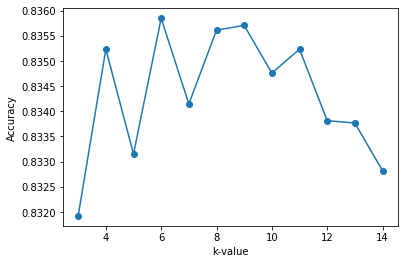

In [ ]:
#find correspomd k value corresponding to highest accuracy
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k-value')
plt.ylabel('Accuracy')

In [ ]:
#Make a model with k as 6
knn=KNeighborsClassifier(n_neighbors=6,metric='minkowski')#instance of KNN to variable
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [ ]:
print('accuracy of KNN is: ',accuracy_score(y_test,y_pred))
print('precision of KNN is : ',precision_score(y_test,y_pred))
print('recall of KNN is : ',recall_score(y_test,y_pred))
print('f1 score of KNN is : ',f1_score(y_test,y_pred))

accuracy of KNN is:  0.8358477181366754
precision of KNN is :  0.8491228070175438
recall of KNN is :  0.678302968531023
f1 score of KNN is :  0.754161059565125


In [ ]:
confusion_matrix(y_test,y_pred)

array([[12350,   946],
       [ 2525,  5324]])

In [ ]:
x_pred=knn.predict(x_train)
print("Accuracy",accuracy_score(y_train,x_pred))
print("F1 score:",f1_score(y_train,x_pred))
print(classification_report(y_train,x_pred))

Accuracy 0.8721386681800983
F1 score: 0.8079491368899624
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     53487
           1       0.90      0.73      0.81     31089

    accuracy                           0.87     84576
   macro avg       0.88      0.84      0.86     84576
weighted avg       0.88      0.87      0.87     84576



**c.SVM**

**1.Linear SVM**

In [ ]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)

In [ ]:
print('Accuracy on linear SVM is : ',accuracy_score(y_test,y_pred))
print('precision is : ',precision_score(y_test,y_pred))
print('recall is : ',recall_score(y_test,y_pred))
print('f1 score is : ',f1_score(y_test,y_pred))

Accuracy on linear SVM is :  0.7971624497517144
precision is :  0.8391768292682927
recall is :  0.5610905847878711
f1 score is :  0.6725204245247003


In [ ]:
confusion_matrix(y_test,y_pred)

array([[12452,   844],
       [ 3445,  4404]])

In [ ]:
x_pred=svm.predict(x_train)
print("Accuracy",accuracy_score(y_train,x_pred))
print("F1 score:",f1_score(y_train,x_pred))
print(classification_report(y_train,x_pred))

Accuracy 0.7980159856223988
F1 score: 0.67118356976498
              precision    recall  f1-score   support

           0       0.79      0.94      0.85     53487
           1       0.84      0.56      0.67     31089

    accuracy                           0.80     84576
   macro avg       0.81      0.75      0.76     84576
weighted avg       0.80      0.80      0.79     84576



**2.Polynomial SVM**

In [ ]:
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_pred=svm_poly.predict(x_test)

In [ ]:
print('Accuracy on polynomial SVM is : ',accuracy_score(y_test,y_pred))
print('precision is : ',precision_score(y_test,y_pred))
print('recall is : ',recall_score(y_test,y_pred))
print('f1 score is : ',f1_score(y_test,y_pred))

Accuracy on polynomial SVM is :  0.8096949633483093
precision is :  0.8591549295774648
recall is :  0.5828767995923048
f1 score is :  0.6945498709579475


In [ ]:
confusion_matrix(y_test,y_pred)

array([[12546,   750],
       [ 3274,  4575]])

In [ ]:
x_pred=svm_poly.predict(x_train)
print("Accuracy",accuracy_score(y_train,x_pred))
print("F1 score:",f1_score(y_train,x_pred))
print(classification_report(y_train,x_pred))

Accuracy 0.8100997919031404
F1 score: 0.6934046005535935
              precision    recall  f1-score   support

           0       0.80      0.94      0.86     53487
           1       0.85      0.58      0.69     31089

    accuracy                           0.81     84576
   macro avg       0.82      0.76      0.78     84576
weighted avg       0.82      0.81      0.80     84576



**3. Radial SVM**

In [ ]:
svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_pred=svm_radial.predict(x_test)

In [ ]:
print('Accuracy on Radial SVM is : ',accuracy_score(y_test,y_pred))
print('precision is : ',precision_score(y_test,y_pred))
print('recall is : ',recall_score(y_test,y_pred))
print('f1 score is : ',f1_score(y_test,y_pred))

Accuracy on Radial SVM is :  0.8229841570111137
precision is :  0.8276412384296201
recall is :  0.6607211109695502
f1 score is :  0.734821112291888


In [ ]:
confusion_matrix(y_test,y_pred)

array([[12216,  1080],
       [ 2663,  5186]])

In [ ]:
x_pred=svm_radial.predict(x_train)
print("Accuracy",accuracy_score(y_train,x_pred))
print("F1 score:",f1_score(y_train,x_pred))
print(classification_report(y_train,x_pred))

Accuracy 0.8244892167990919
F1 score: 0.7354387966065444
              precision    recall  f1-score   support

           0       0.82      0.92      0.87     53487
           1       0.82      0.66      0.74     31089

    accuracy                           0.82     84576
   macro avg       0.82      0.79      0.80     84576
weighted avg       0.82      0.82      0.82     84576



**d. Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [ ]:
print('Accuracy on Random Forest is : ',accuracy_score(y_test,y_pred))
print('precision is : ',precision_score(y_test,y_pred))
print('recall is : ',recall_score(y_test,y_pred))
print('f1 score is : ',f1_score(y_test,y_pred))

Accuracy on Random Forest is :  0.8539134547174273
precision is :  0.8250478011472275
recall is :  0.7696521849917187
f1 score is :  0.7963878452310329


In [ ]:
confusion_matrix(y_test,y_pred)

array([[12015,  1281],
       [ 1808,  6041]])

In [ ]:
x_pred=rf.predict(x_train)
print("Accuracy",accuracy_score(y_train,x_pred))
print("F1 score:",f1_score(y_train,x_pred))
print(classification_report(y_train,x_pred))

Accuracy 0.9763762769580022
F1 score: 0.9676384839650146
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     53487
           1       0.97      0.96      0.97     31089

    accuracy                           0.98     84576
   macro avg       0.98      0.97      0.97     84576
weighted avg       0.98      0.98      0.98     84576



**Feature Importance**

In [ ]:
pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)*100

lead_time                      31.380203
arrival_date_month              9.678268
Non Refund                      8.750695
country                         7.237882
total_stay                      7.061584
No Deposit                      7.057841
total_of_special_requests       5.328579
previous_cancellations          3.859611
Online TA                       3.447148
booking_changes                 2.487794
total_guests                    2.289264
required_car_parking_spaces     2.223418
Transient                       1.701284
Offline TA/TO                   1.472852
hotel                           1.410599
Transient-Party                 1.180707
Groups                          0.996978
Direct                          0.882004
kids                            0.681196
Corporate                       0.483547
Contract                        0.173161
Complementary                   0.080567
Group                           0.044930
Aviation                        0.043928
Refundable      

# **Model Fine Tuning**

In [ ]:
rft=RandomForestClassifier(bootstrap=True,n_estimators=500,oob_score=True,max_depth=20,criterion='entropy',random_state=92)
rft.fit(x_train,y_train)
y_pred=rft.predict(x_test)

In [ ]:
print('Accuracy on fine tuned Random Forest is : ',accuracy_score(y_test,y_pred))
print('precision is : ',precision_score(y_test,y_pred))
print('recall is : ',recall_score(y_test,y_pred))
print('f1 score is : ',f1_score(y_test,y_pred))

Accuracy on fine tuned Random Forest is :  0.8594939702057224
precision is :  0.8430379746835444
recall is :  0.7636641610396229
f1 score is :  0.8013904672772244


In [ ]:
confusion_matrix(y_test,y_pred)

array([[12180,  1116],
       [ 1855,  5994]])

In [ ]:
x_pred=rft.predict(x_train)
print("Accuracy",accuracy_score(y_train,x_pred))
print("F1 score:",f1_score(y_train,x_pred))
print(classification_report(y_train,x_pred))

Accuracy 0.8993094967839577
F1 score: 0.8587353194877579
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     53487
           1       0.89      0.83      0.86     31089

    accuracy                           0.90     84576
   macro avg       0.90      0.89      0.89     84576
weighted avg       0.90      0.90      0.90     84576



# **Conclusion**

* Tuned Random Forest has the Best accuracy among all algorithms that we tried.

* We can see that Tuned Random Forest has the best accuracy when it comes to predicting hotel cancellation based on certain features (85.94 %).

* This model will allow hotel managers / revenue manager to take actions on bookings that's identified as "potentially going to be canceled", furthermore the development of these model should contribute to hotel revenue management.

* These prediction models enable hotel managers to mitigate revenue loss derived from booking cancellations and to mitigate the risks associated with overbooking (reallocation costs, cash or service compensations, and, particularly important today, social reputation costs). 